# Topic: Customer Clustering with RFM 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from datetime import datetime

Data understanding

In [2]:
products = pd.read_csv('Data/Products_with_Categories.csv')
transactions = pd.read_csv('Data/Transactions.csv')

In [3]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    167 non-null    int64  
 1   productName  167 non-null    object 
 2   price        167 non-null    float64
 3   Category     167 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


In [4]:
products.head(5)

,productId,productName,price,Category
0,1,tropical fruit,7.8,Fresh Food
1,2,whole milk,1.8,Dairy
2,3,pip fruit,3.0,Fresh Food
3,4,other vegetables,0.8,Fresh Food
4,5,rolls/buns,1.2,Bakery & Sweets


In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_number  38765 non-null  int64 
 1   Date           38765 non-null  object
 2   productId      38765 non-null  int64 
 3   items          38765 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


In [6]:
transactions.head(5)

,Member_number,Date,productId,items
0,1808,21-07-2015,1,3
1,2552,05-01-2015,2,1
2,2300,19-09-2015,3,3
3,1187,12-12-2015,4,3
4,3037,01-02-2015,2,1


Data Pre-processing

In [7]:
string_to_date = lambda x : datetime.strptime(x, "%d-%m-%Y").date()
transactions['Date'] = transactions['Date'].apply(string_to_date)
transactions['Date'] = transactions['Date'].astype('datetime64[ns]')

In [8]:
transactions.isnull().sum()

Member_number    0
Date             0
productId        0
items            0
dtype: int64

In [9]:
products.isnull().sum()

productId      0
productName    0
price          0
Category       0
dtype: int64

In [10]:
transactions.isna().sum()

Member_number    0
Date             0
productId        0
items            0
dtype: int64

In [11]:
products.isna().sum()

productId      0
productName    0
price          0
Category       0
dtype: int64

In [12]:
df = transactions.merge(products, on='productId', how='left')

In [13]:
df.head(5)

,Member_number,Date,productId,items,productName,price,Category
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food
1,2552,2015-01-05,2,1,whole milk,1.8,Dairy
2,2300,2015-09-19,3,3,pip fruit,3.0,Fresh Food
3,1187,2015-12-12,4,3,other vegetables,0.8,Fresh Food
4,3037,2015-02-01,2,1,whole milk,1.8,Dairy


In [14]:
df['total_sales'] = df['items'] * df['price']

In [15]:
df['transaction_id'] = range(1,len(df)+1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38765 entries, 0 to 38764
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Member_number   38765 non-null  int64         
 1   Date            38765 non-null  datetime64[ns]
 2   productId       38765 non-null  int64         
 3   items           38765 non-null  int64         
 4   productName     38765 non-null  object        
 5   price           38765 non-null  float64       
 6   Category        38765 non-null  object        
 7   total_sales     38765 non-null  float64       
 8   transaction_id  38765 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.0+ MB


In [17]:
print('{:,} unique member_number'.format(transactions['Member_number'].nunique()))
print('Transactions timeframe from {} to {}'.format(transactions['Date'].min(), transactions['Date'].max()))

3,898 unique member_number
Transactions timeframe from 2014-01-01 00:00:00 to 2015-12-30 00:00:00


In [18]:
df.where(df['price']<0).any()

Member_number     False
Date              False
productId         False
items             False
productName       False
price             False
Category          False
total_sales       False
transaction_id    False
dtype: bool

In [19]:
df.where(df['items']<=0).any()

Member_number     False
Date              False
productId         False
items             False
productName       False
price             False
Category          False
total_sales       False
transaction_id    False
dtype: bool

RFM

In [20]:
max_date = df['Date'].max().date()

Recency = Recency = lambda x : (max_date - x.max().date()).days
Frequency  = lambda x: len(x.unique())
Monetary = lambda x: sum(x)

df_RFM = df.groupby('Member_number').agg({'Date':Recency,
                                          'transaction_id': Frequency,
                                          'total_sales':Monetary})


In [21]:
df_RFM.head()

,Date,transaction_id,total_sales
Member_number,,,
1000,35,13,53.80
1001,242,12,100.00
1002,122,8,70.30
1003,323,8,60.65
1004,28,21,204.96


In [22]:
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']

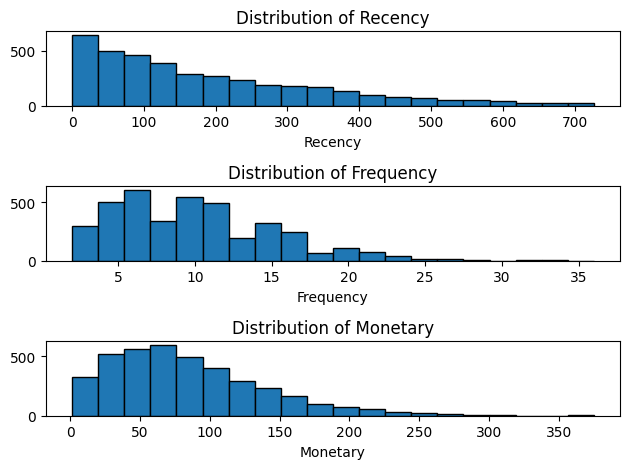

In [23]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.hist(df_RFM['Recency'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.hist(df_RFM['Frequency'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.hist(df_RFM['Monetary'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

Cả 3 Recency, Frequency and Monetary đều right skew và không phải normal distribution --> Log transfomation để giảm skewness

In [24]:
df_log_transformed = df_RFM.apply(lambda x: np.log1p(x) if x.name in ['Recency', 'Frequency', 'Monetary'] else x)

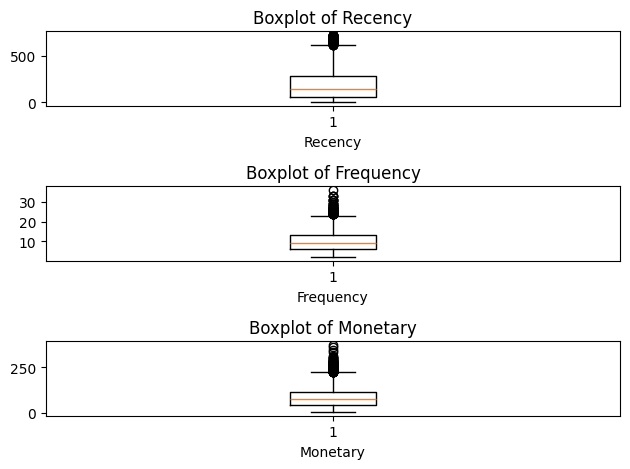

In [25]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.boxplot(df_RFM['Recency']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.boxplot(df_RFM['Frequency']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.boxplot(df_RFM['Monetary']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

Cả 3 Recency, Frequency and Monetary đều có nhiều upper outliers --> Robust Scaler để giảm ảnh hưởng của outliers

In [26]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
df_scaled = pd.DataFrame(robust.fit_transform(df_log_transformed[['Recency', 'Frequency', 'Monetary']]), 
                         columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'], 
                         index=df_RFM.index)

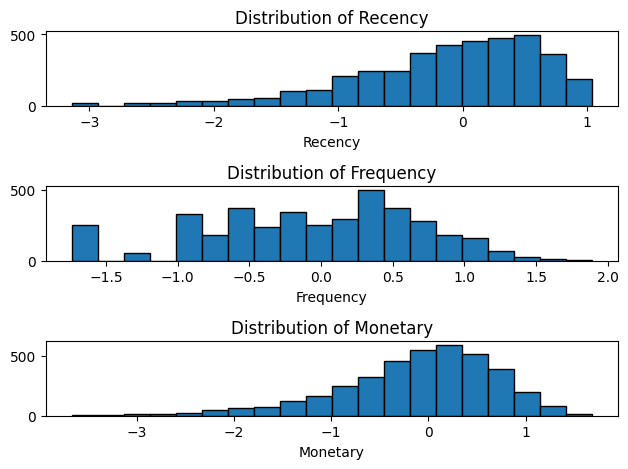

In [27]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.hist(df_scaled['Recency_scaled'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.hist(df_scaled['Frequency_scaled'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.hist(df_scaled['Monetary_scaled'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

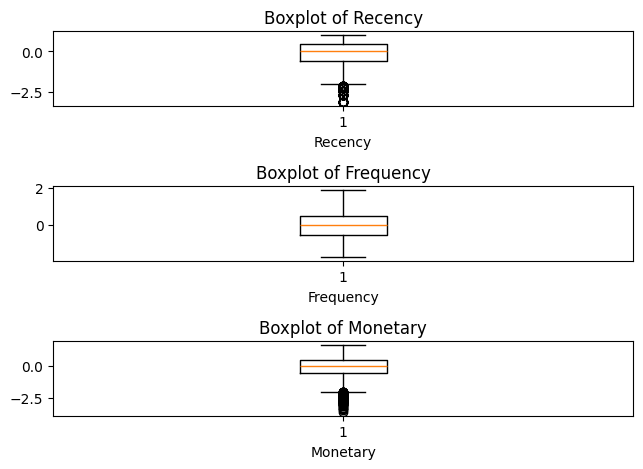

In [28]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.boxplot(df_scaled['Recency_scaled']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.boxplot(df_scaled['Frequency_scaled']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.boxplot(df_scaled['Monetary_scaled']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

In [29]:
df_scaled.head()

,Recency_scaled,Frequency_scaled,Monetary_scaled
Member_number,,,
1000,-0.869699,0.485427,-0.341540
1001,0.340472,0.378512,0.299574
1002,-0.091033,-0.152003,-0.065556
1003,0.522790,-0.152003,-0.218039
1004,-1.006730,1.137504,1.046730


# Kmeans Pyspark

In [30]:
import findspark
findspark.init()

In [31]:
from pyspark import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import *
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.sql.functions import *
from pyspark.ml.functions import *

In [32]:
spark = SparkSession.builder.appName('KMeansPypark').getOrCreate()

25/03/30 00:47:15 WARN Utils: Your hostname, Mac-cua-Beo.local resolves to a loopback address: 127.0.0.1; using 192.168.2.130 instead (on interface en0)
25/03/30 00:47:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/03/30 00:47:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [33]:
df_spark = spark.createDataFrame(df_scaled)
df_spark.show(5)

+--------------------+--------------------+--------------------+
|      Recency_scaled|    Frequency_scaled|     Monetary_scaled|
+--------------------+--------------------+--------------------+
| -0.8696989539958225|  0.4854268271702412|  -0.341540208732832|
|  0.3404717765709194| 0.37851162325372956| 0.29957448788743846|
|-0.09103342473509425|-0.15200309344505006|-0.06555566218796775|
|  0.5227900140018243|-0.15200309344505006| -0.2180389161975314|
| -1.0067301415566077|  1.1375035237499351|  1.0467301425621423|
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [34]:

assembler = VectorAssembler(inputCols=df_spark.columns, outputCol="raw_features")
final_data = assembler.transform(df_spark)

In [35]:
scaler = StandardScaler(
    inputCol="raw_features",
    outputCol="features",
    withStd=True,
    withMean=False)

In [36]:
final_data = scaler.fit(final_data).transform(final_data)

In [37]:
final_data.show(5)

+--------------------+--------------------+--------------------+--------------------+--------------------+
|      Recency_scaled|    Frequency_scaled|     Monetary_scaled|        raw_features|            features|
+--------------------+--------------------+--------------------+--------------------+--------------------+
| -0.8696989539958225|  0.4854268271702412|  -0.341540208732832|[-0.8696989539958...|[-1.1441985381759...|
|  0.3404717765709194| 0.37851162325372956| 0.29957448788743846|[0.34047177657091...|[0.44793351452561...|
|-0.09103342473509425|-0.15200309344505006|-0.06555566218796775|[-0.0910334247350...|[-0.1197659385796...|
|  0.5227900140018243|-0.15200309344505006| -0.2180389161975314|[0.52279001400182...|[0.68779612421693...|
| -1.0067301415566077|  1.1375035237499351|  1.0467301425621423|[-1.0067301415566...|[-1.3244803285255...|
+--------------------+--------------------+--------------------+--------------------+--------------------+
only showing top 5 rows



In [38]:
k_list = []
silhouette_list = []
sil_str = ""

for k in range(2, 11):
    kmeans = KMeans(featuresCol='features', k=k)
    model = kmeans.fit(final_data)
    k_list.append(k)

    # Dự đoán
    predictions = model.transform(final_data)
    
    # Đánh giá clustering bằng Silhouette score
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    silhouette_list.append(silhouette)
    sil_str = sil_str + "With k = " + str(k) + " - Silhouette = " + str(silhouette) + "\n"

print(sil_str)

25/03/30 00:47:28 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
25/03/30 00:47:28 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


With k = 2 - Silhouette = 0.5717849444843094
With k = 3 - Silhouette = 0.46932327970280546
With k = 4 - Silhouette = 0.48352143094832484
With k = 5 - Silhouette = 0.4323829056819112
With k = 6 - Silhouette = 0.4299864859914849
With k = 7 - Silhouette = 0.44160881490698844
With k = 8 - Silhouette = 0.4367151511271033
With k = 9 - Silhouette = 0.4084402201401443
With k = 10 - Silhouette = 0.3854833678395904



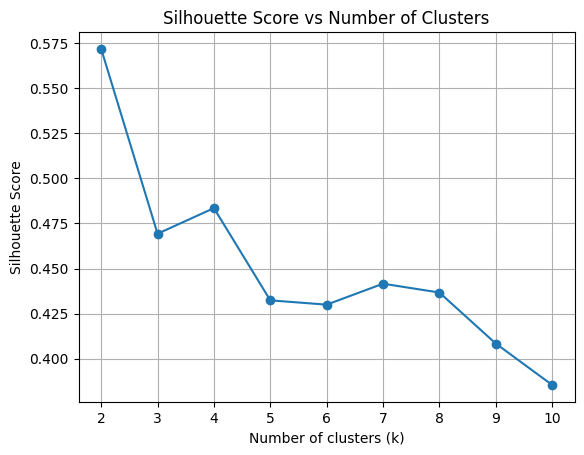

In [39]:
plt.plot(k_list, silhouette_list, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

In [40]:
# train a k-means model
kmeans = KMeans(featuresCol='features',k=4)
model = kmeans.fit(final_data)

In [41]:
centers=model.clusterCenters()
print("Cluster centers: ")
for center in centers:
    print(center)

Cluster centers: 
[-1.84277366  0.34257324  0.17291366]
[-0.22219466  0.86689107  0.72734445]
[ 0.28642193 -0.36237168 -0.33320796]
[ 0.5279496  -1.69898073 -1.85344597]


In [42]:
centers_df = pd.DataFrame(centers)
centers_df.head()

,0,1,2
0,-1.842774,0.342573,0.172914
1,-0.222195,0.866891,0.727344
2,0.286422,-0.362372,-0.333208
3,0.527950,-1.698981,-1.853446


In [43]:
predictions = model.transform(final_data)
predictions.show(5)

+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|      Recency_scaled|    Frequency_scaled|     Monetary_scaled|        raw_features|            features|prediction|
+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
| -0.8696989539958225|  0.4854268271702412|  -0.341540208732832|[-0.8696989539958...|[-1.1441985381759...|         0|
|  0.3404717765709194| 0.37851162325372956| 0.29957448788743846|[0.34047177657091...|[0.44793351452561...|         1|
|-0.09103342473509425|-0.15200309344505006|-0.06555566218796775|[-0.0910334247350...|[-0.1197659385796...|         2|
|  0.5227900140018243|-0.15200309344505006| -0.2180389161975314|[0.52279001400182...|[0.68779612421693...|         2|
| -1.0067301415566077|  1.1375035237499351|  1.0467301425621423|[-1.0067301415566...|[-1.3244803285255...|         1|
+--------------------+--------------------+-------------

In [44]:
clustered = predictions.select("Recency_scaled", "Frequency_scaled", "Monetary_scaled", "prediction").toPandas()

Text(0.5, 0.92, 'Customer Segmentation KMeans PySpark')

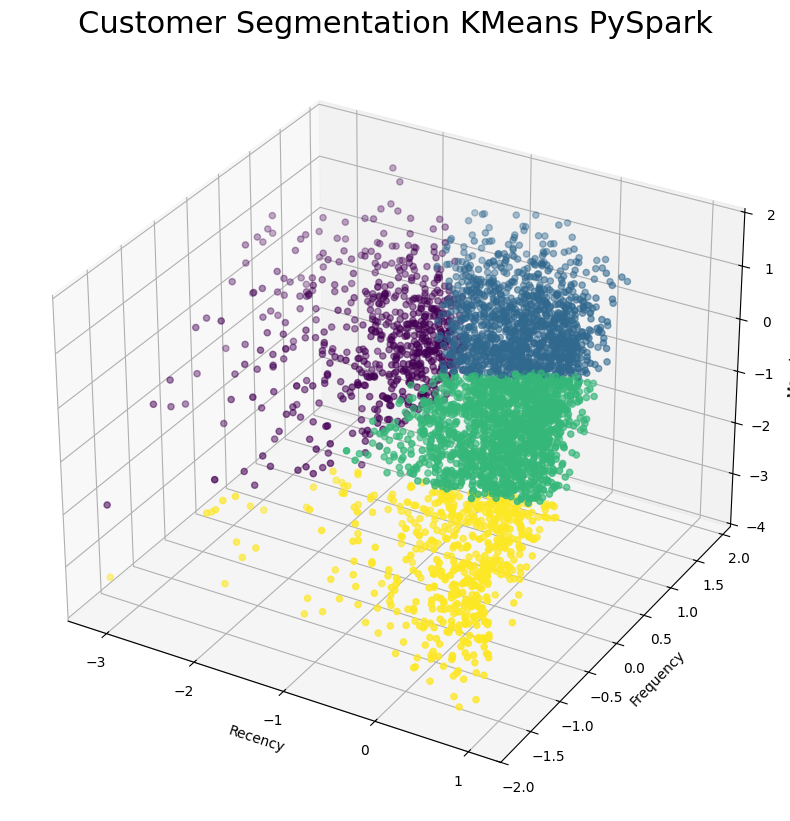

In [45]:
fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(clustered.Recency_scaled, clustered.Frequency_scaled, clustered.Monetary_scaled, c=clustered.prediction, cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title("Customer Segmentation KMeans PySpark", fontsize=22) 